## XML 형식의 데이터 처리
- 마크업 언어: 꺾쇠로 이루어진 태그 안에 또 다른 태그가 존재하는 형태
- 중첩 dictionary 형태로 접근 가능
- python에서 dictionary 형태와 다른 형태로 모두 접근 가능: xmltodict, BeautifulSoup
- RSS(Really Simple Syndication, Rich Site Summary)
 - 콘텐츠 업데이트가 자주 발생하는 웹사이트에서 업데이트된 정보를 쉽게 제공하기 위해 XML을 기초로 만들어진 데이터 형식
 - 뉴스 사이트, 블로그 등

#### Python에서 Dictionary 형태로 사용 가능한 데이터
- JSON, XML

#### Python에서 Dictionary 형태가 아닌 다른 방식으로 사용하는 데이터
- XML, HTML

## xmltodict(XML to Dictionary)
- XML 형식의 데이터를 dictionary 형태로 변환

### 날씨 정보 수집
- '동네 예보 rss' 구글 검색
- 'RSS 서비스 안내 - 기상청' 접속(https://www.weather.go.kr/w/pop/rss-guide.do)
- 지역 선택 후 RSS 클릭
- 링크 복사 후 이동(http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=1135061100)

In [1]:
import requests

# XML 파일이 담긴 링크를 url 변수에 할당(위에서 복사한 링크)
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=1135061100'

response = requests.get(url).text
response[:100]

'<?xml version="1.0" encoding="UTF-8" ?>\n<rss version="2.0">\n<channel>\n<title>기상청 동네예보 웹서비스 - 서울특별시 노'

In [2]:
# !pip install xmltodict

In [3]:
import xmltodict

# response에 저장된 정보를 parsing
# parse -> 해석, 해독, 변환: 저장된 정보를 유지하고 형식만 변환
data = xmltodict.parse(response)
type(data)

dict

In [4]:
data.keys()

dict_keys(['rss'])

In [5]:
data['rss'].keys()

# @version은 버전을 나누는 시스템 관련 데이터(불필요)

dict_keys(['@version', 'channel'])

In [6]:
data['rss']['channel'].keys()

dict_keys(['title', 'link', 'description', 'language', 'generator', 'pubDate', 'item'])

In [7]:
data['rss']['channel']['title']

# XML 파일에서 하위 태그에 접근하는 방식과 유사
# 각각의 태그가 dictionary의 key로 변환
# 원본 XML 파일을 같이 보면서 접근하면 편함

'기상청 동네예보 웹서비스 - 서울특별시 노원구 하계1동 도표예보'

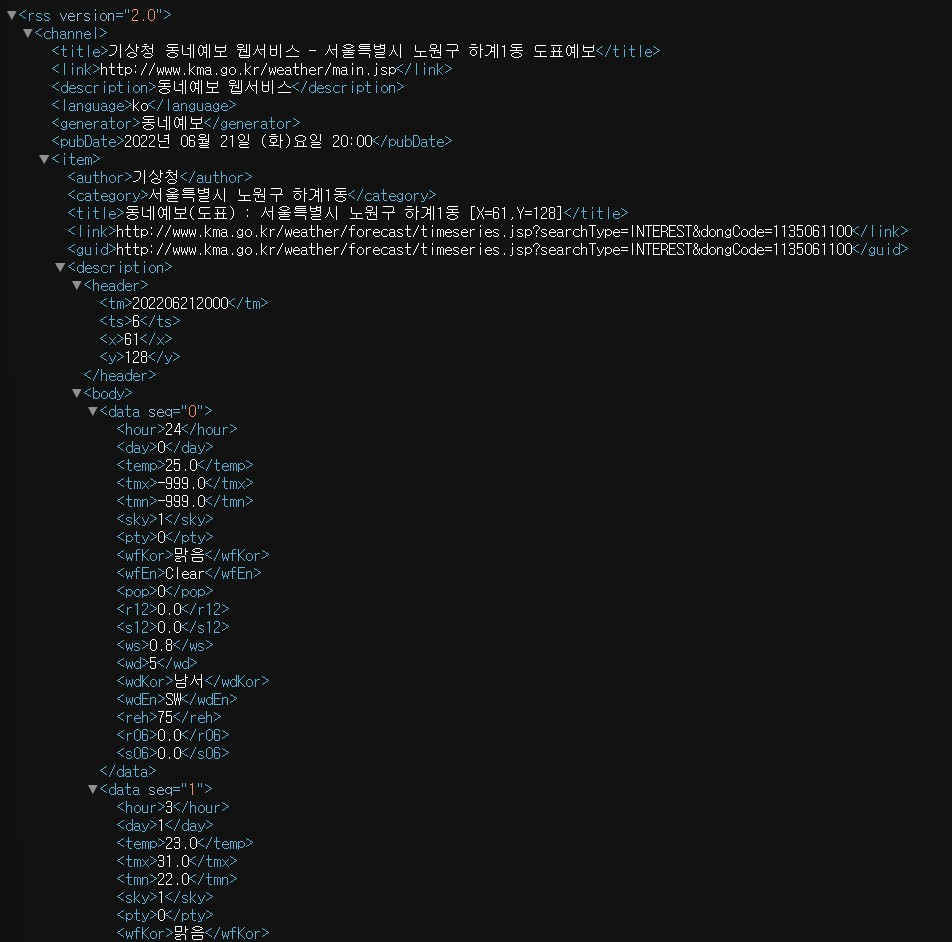

In [8]:
# wfKor 태그에서 날씨 정보 가져오기

# XML 파일에서 wfKor 태그 위치 확인:
# rss - channel - item - description - body - data - wfKor

type(data['rss']['channel']['item']['description']['body']['data'])

# dictionary 형태인 앞선 key들의 value 값과 다르게 data의 value 값은 list
# 3시간 주기의 날씨 정보가 XML 파일 내 서로 다른 <data> 태그 안에 저장된 형태
# 동일한 형식의 정보를 담은 동일한 태그가 반복되는 경우, parsing 작업을 거치면서 dictionary가 아닌 list로 변환
# 하위 태그로 넘어가면서 데이터의 형태를 확인하고 그에 맞는 방식을 적용해야 함

list

In [9]:
# weather_list에 저장
weather_list = data['rss']['channel']['item']['description']['body']['data']
weather_list[0].keys()

dict_keys(['@seq', 'hour', 'day', 'temp', 'tmx', 'tmn', 'sky', 'pty', 'wfKor', 'wfEn', 'pop', 'r12', 's12', 'ws', 'wd', 'wdKor', 'wdEn', 'reh', 'r06', 's06'])

In [10]:
weather_list[0]['wfKor']

'흐림'

In [11]:
weather_list[:3]

# dictionary 형태로 정보가 담겨 있으므로 pandas로 데이터프레임 변환 가능

[{'@seq': '0',
  'hour': '24',
  'day': '0',
  'temp': '24.0',
  'tmx': '-999.0',
  'tmn': '-999.0',
  'sky': '4',
  'pty': '0',
  'wfKor': '흐림',
  'wfEn': 'Cloudy',
  'pop': '30',
  'r12': '0.0',
  's12': '0.0',
  'ws': '1.3',
  'wd': '7',
  'wdKor': '북서',
  'wdEn': 'NW',
  'reh': '85',
  'r06': '0.0',
  's06': '0.0'},
 {'@seq': '1',
  'hour': '3',
  'day': '1',
  'temp': '23.0',
  'tmx': '30.0',
  'tmn': '22.0',
  'sky': '4',
  'pty': '0',
  'wfKor': '흐림',
  'wfEn': 'Cloudy',
  'pop': '30',
  'r12': '0.0',
  's12': '0.0',
  'ws': '0.9',
  'wd': '7',
  'wdKor': '북서',
  'wdEn': 'NW',
  'reh': '90',
  'r06': '0.0',
  's06': '0.0'},
 {'@seq': '2',
  'hour': '6',
  'day': '1',
  'temp': '23.0',
  'tmx': '30.0',
  'tmn': '22.0',
  'sky': '4',
  'pty': '0',
  'wfKor': '흐림',
  'wfEn': 'Cloudy',
  'pop': '30',
  'r12': '0.0',
  's12': '0.0',
  'ws': '0.7000000000000001',
  'wd': '0',
  'wdKor': '북',
  'wdEn': 'N',
  'reh': '90',
  'r06': '0.0',
  's06': '0.0'}]

In [12]:
import pandas as pd

pd.DataFrame(weather_list)

,@seq,hour,day,temp,tmx,tmn,sky,pty,wfKor,wfEn,pop,r12,s12,ws,wd,wdKor,wdEn,reh,r06,s06
0,0,24,0,24.0,-999.0,-999.0,4,0,흐림,Cloudy,30,0.0,0.0,1.3,7,북서,NW,85,0.0,0.0
1,1,3,1,23.0,30.0,22.0,4,0,흐림,Cloudy,30,0.0,0.0,0.9,7,북서,NW,90,0.0,0.0
2,2,6,1,23.0,30.0,22.0,4,0,흐림,Cloudy,30,0.0,0.0,0.7000000000000001,0,북,N,90,0.0,0.0
3,3,9,1,25.0,30.0,22.0,4,0,흐림,Cloudy,30,0.0,0.0,1.2000000000000002,0,북,N,80,1.0,0.0
4,4,12,1,28.0,30.0,22.0,3,4,소나기,Shower,60,0.0,0.0,1.2000000000000002,0,북,N,65,1.0,0.0
5,5,15,1,29.0,30.0,22.0,3,4,소나기,Shower,60,0.0,0.0,1.1,7,북서,NW,65,20.9,0.0
6,6,18,1,29.0,30.0,22.0,3,4,소나기,Shower,60,0.0,0.0,1.4000000000000001,6,서,W,65,20.9,0.0
7,7,21,1,27.0,30.0,22.0,4,0,흐림,Cloudy,30,0.0,0.0,0.9,6,서,W,75,0.0,0.0
8,8,24,1,25.0,30.0,22.0,1,0,맑음,Clear,0,0.0,0.0,0.30000000000000004,4,남,S,80,0.0,0.0
9,9,3,2,23.0,30.0,23.0,1,0,맑음,Clear,10,0.0,0.0,0.4,3,남동,SE,85,0.0,0.0


In [13]:
# weather_list를 csv 파일로 저장
df = pd.DataFrame(weather_list)
df.to_csv('weather.csv', index=False)

# 이 상태로 저장하면 한글이 깨지는 문제 발생(인코딩 문제)
# 엑셀로 열면 한글이 깨지지만, 메모장으로 열면 정상 출력 -> 데이터 손상 문제 x
# 글자 깨짐 문제는 데이터를 저장하는 방식과 읽는 방식이 다를 때 발생
# 데이터를 저장하고 읽는 방식을 맞춰주면 해결 가능
# to_csv() encoding 파라미터의 기본값은 'utf-8'

In [14]:
# python 인코딩에 대한 공식 문서:
# https://docs.python.org/ko/3/library/codecs.html
# '표준 인코딩' 부분에서 사용 가능한 코덱 정보(인코딩 방식) 확인 가능
# 기본값인 utf-8 방식으로 깨졌으므로 그 아래 utf-8-sig 방식 시도

df = pd.DataFrame(weather_list)
df.to_csv('weather.csv', index=False, encoding='utf-8-sig')

In [15]:
# 예제) https://docs.python.org/ko/3/library/codecs.html에서 사용 가능한 코덱 정보를 모두 수집

import pandas as pd

path = 'https://docs.python.org/ko/3/library/codecs.html'
tables = pd.read_html(path)

print(type(tables), len(tables)) # list 형태로 반환

<class 'list'> 8


In [16]:
# 문제에서 요구한 테이블이 맞는지 하나씩 확인
tables[0]

,값,의미
0,'strict',"Raise UnicodeError (or a subclass), this is th..."
1,'ignore',잘못된 데이터를 무시하고 추가 통지 없이 계속 진행합니다. ignore_errors...
2,'replace',Replace with a replacement marker. On encoding...
3,'backslashreplace',Replace with backslashed escape sequences. On ...
4,'surrogateescape',"디코딩 시, 바이트를 U+DC80에서 U+DCFF 범위의 개별 서로게이트 코드(su..."


In [17]:
tables[1]

,값,의미
0,'xmlcharrefreplace',Replace with XML/HTML numeric character refere...
1,'namereplace',"Replace with \N{...} escape sequences, what ap..."


In [18]:
tables[2]

,값,코덱,의미
0,'surrogatepass',"utf-8, utf-16, utf-32, utf-16-be, utf-16-le, u...",Allow encoding and decoding surrogate code poi...


In [19]:
tables[3]

,범위,인코딩
0,U-00000000 … U-0000007F,0xxxxxxx
1,U-00000080 … U-000007FF,110xxxxx 10xxxxxx
2,U-00000800 … U-0000FFFF,1110xxxx 10xxxxxx 10xxxxxx
3,U-00010000 … U-0010FFFF,11110xxx 10xxxxxx 10xxxxxx 10xxxxxx


In [20]:
tables[4] # 문제에서 요구한 코덱 정보가 담긴 테이블

,코덱,별칭,언어
0,ascii,"646, us-ascii",영어
1,big5,"big5-tw, csbig5",중국어 번체
2,big5hkscs,"big5-hkscs, hkscs",중국어 번체
3,cp037,"IBM037, IBM039",영어
4,cp273,"273, IBM273, csIBM273",독일어 버전 3.4에 추가.
...,...,...,...
92,utf_16_be,UTF-16BE,모든 언어
93,utf_16_le,UTF-16LE,모든 언어
94,utf_7,"U7, unicode-1-1-utf-7",모든 언어
95,utf_8,"U8, UTF, utf8, cp65001",모든 언어


In [21]:
for i in tables[4]['코덱']:
    print(i, end=' ')

ascii big5 big5hkscs cp037 cp273 cp424 cp437 cp500 cp720 cp737 cp775 cp850 cp852 cp855 cp856 cp857 cp858 cp860 cp861 cp862 cp863 cp864 cp865 cp866 cp869 cp874 cp875 cp932 cp949 cp950 cp1006 cp1026 cp1125 cp1140 cp1250 cp1251 cp1252 cp1253 cp1254 cp1255 cp1256 cp1257 cp1258 euc_jp euc_jis_2004 euc_jisx0213 euc_kr gb2312 gbk gb18030 hz iso2022_jp iso2022_jp_1 iso2022_jp_2 iso2022_jp_2004 iso2022_jp_3 iso2022_jp_ext iso2022_kr latin_1 iso8859_2 iso8859_3 iso8859_4 iso8859_5 iso8859_6 iso8859_7 iso8859_8 iso8859_9 iso8859_10 iso8859_11 iso8859_13 iso8859_14 iso8859_15 iso8859_16 johab koi8_r koi8_t koi8_u kz1048 mac_cyrillic mac_greek mac_iceland mac_latin2 mac_roman mac_turkish ptcp154 shift_jis shift_jis_2004 shift_jisx0213 utf_32 utf_32_be utf_32_le utf_16 utf_16_be utf_16_le utf_7 utf_8 utf_8_sig 

### 뉴스 기사 정보 수집
- 구글 뉴스: https://news.google.com/search?q=뽀로로&hl=ko&gl=KR&ceid=KR%3Ako
- RSS: https://news.google.com/rss/search?q=뽀로로&hl=ko&gl=KR&ceid=KR%3Ako
- 도메인 뒤에 rss/ 삽입하면 웹사이트를 XML 파일 형태로 확인 가능

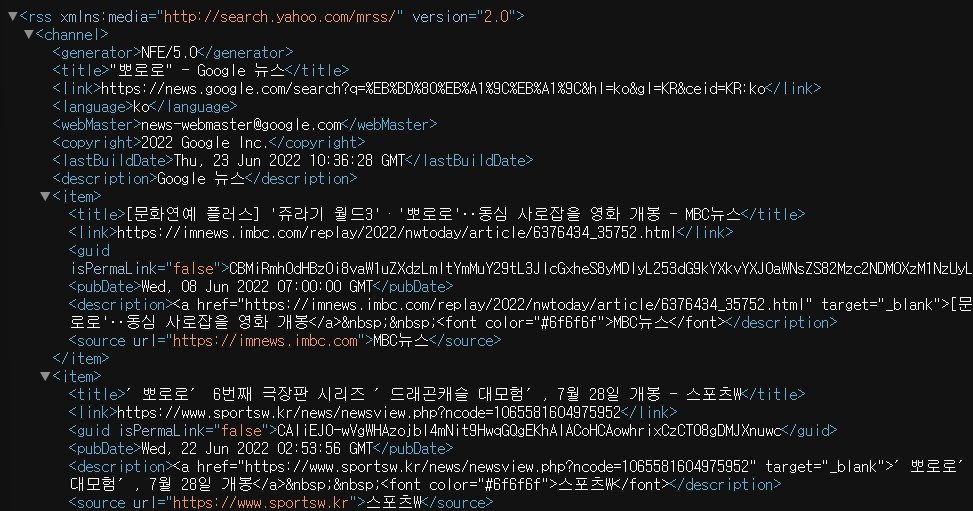

In [22]:
import requests
import xmltodict

url = 'https://news.google.com/rss/search?q=뽀로로&hl=ko&gl=KR&ceid=KR%3Ako'

response = requests.get(url).text
news_data = xmltodict.parse(response)

In [23]:
type(news_data)

dict

In [24]:
news_list = news_data['rss']['channel']['item']

# item 태그 안의 기사 정보가 list 형태로 존재
# 동일한 형식의 정보를 포함한 동일한 태그가 반복되는 경우 list 형태로 반환

news_list[0].keys()

dict_keys(['title', 'link', 'guid', 'pubDate', 'description', 'source'])

In [25]:
import pandas as pd

pd.DataFrame(news_list).head(3)

,title,link,guid,pubDate,description,source
0,"미니언즈·뽀로로·도라에몽…여름방학 극장가, 애니메이션이 쏟아진다 - 동아일보",https://www.donga.com/news/Culture/article/all...,"{'@isPermaLink': 'false', '#text': '1507442230'}","Wed, 20 Jul 2022 05:00:00 GMT","<ol><li><a href=""https://www.donga.com/news/Cu...","{'@url': 'https://www.donga.com', '#text': '동아..."
1,박해일표 이순신의 출정…6번째 뽀로로 컴백 - 텐아시아,https://tenasia.hankyung.com/movie/article/202...,"{'@isPermaLink': 'false', '#text': 'CBMiOGh0dH...","Thu, 21 Jul 2022 08:53:00 GMT","<a href=""https://tenasia.hankyung.com/movie/ar...","{'@url': 'https://tenasia.hankyung.com', '#tex..."
2,"[포토] 펭수·뽀로로·타요, 다 있어요 : 경제일반 : 경제 : 뉴스 - 한겨레",https://www.hani.co.kr/arti/economy/economy_ge...,"{'@isPermaLink': 'false', '#text': 'CBMiQGh0dH...","Thu, 14 Jul 2022 06:27:01 GMT","<a href=""https://www.hani.co.kr/arti/economy/e...","{'@url': 'https://www.hani.co.kr', '#text': '한..."


In [26]:
# 사용자가 입력한 키워드에 대한 뉴스 정보를 파일에 저장하는 함수 생성

def news_get(keyword):
    url = f'https://news.google.com/rss/search?q={keyword}&hl=ko&gl=KR&ceid=KR%3Ako'
    response = requests.get(url).text
    news_data = xmltodict.parse(response)
    news_list = news_data['rss']['channel']['item']
    pd.DataFrame(news_list).to_csv(keyword + '.csv', index=False, encoding='utf-8-sig')

In [27]:
news_get('뽀로로')

In [28]:
pororo = pd.read_csv('뽀로로.csv')
pororo.head(3)

,title,link,guid,pubDate,description,source
0,"미니언즈·뽀로로·도라에몽…여름방학 극장가, 애니메이션이 쏟아진다 - 동아일보",https://www.donga.com/news/Culture/article/all...,"{'@isPermaLink': 'false', '#text': '1507442230'}","Wed, 20 Jul 2022 05:00:00 GMT","<ol><li><a href=""https://www.donga.com/news/Cu...","{'@url': 'https://www.donga.com', '#text': '동아..."
1,박해일표 이순신의 출정…6번째 뽀로로 컴백 - 텐아시아,https://tenasia.hankyung.com/movie/article/202...,"{'@isPermaLink': 'false', '#text': 'CBMiOGh0dH...","Thu, 21 Jul 2022 08:53:00 GMT","<a href=""https://tenasia.hankyung.com/movie/ar...","{'@url': 'https://tenasia.hankyung.com', '#tex..."
2,"[포토] 펭수·뽀로로·타요, 다 있어요 : 경제일반 : 경제 : 뉴스 - 한겨레",https://www.hani.co.kr/arti/economy/economy_ge...,"{'@isPermaLink': 'false', '#text': 'CBMiQGh0dH...","Thu, 14 Jul 2022 06:27:01 GMT","<a href=""https://www.hani.co.kr/arti/economy/e...","{'@url': 'https://www.hani.co.kr', '#text': '한..."


## BeautifulSoup
- HTML, XML 문서를 해석하고 필요한 정보를 추출할 목적의 모듈(주로 HTML)
- 설치: pip install beautifulsoup4
- 문서: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

#### 기존의 같은 정보와 로직을 다른 도구와 다른 프로세스로 이용
- 다른 도구: XML을 xmltodict로 다뤄봤다면, 이번에는 BeautifulSoup 활용
- 다른 프로세스: dictionary의 key:value 형식으로 접근했다면, 이번에는 tag 형태로 접근
- 기존의 정보와 기존에 진행한 로직은 동일

### 날씨 정보 수집

In [29]:
# xmltodict를 활용한 dictionary 형태로의 접근

import requests
import xmltodict

# request
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=1135061100'
response = requests.get(url).text

# parse
# parsing: 어떤 문장을 분석하거나 문법적인 관계를 해석하는 행위
# parser: parsing을 수행하는 프로그램
data = xmltodict.parse(response)

# 데이터 접근
weather_list = data['rss']['channel']['item']['description']['body']['data']
weather_list[0]['wfKor']

'흐림'

In [30]:
# BeautifulSoup을 활용한 tag 형태로의 접근

import requests
from bs4 import BeautifulSoup # 모듈 변경: xmltodict -> bs4.BeautifulSoup

# request -> 방식 동일
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=1135061100'
response = requests.get(url).text

# parse -> parsing 방식 변경
# XML 문서를 BeautifulSoup 클래스로 전달하여 객체 생성
# 문서 parser도 함께 저장, 'xml' parser를 사용
# parser를 설정해주는 features 파라미터(기본값: html)
data = BeautifulSoup(response, features='xml')

# 데이터 접근 -> 데이터에 접근하는 방식 변경
# find(): tag 이름을 문자열로 입력받아 접근하는 메소드(tag가 고유하지 않을 경우 제일 처음 하나를 반환)
data.find('wfKor')

<wfKor>흐림</wfKor>

In [31]:
type(data) # BeautifulSoup 객체

bs4.BeautifulSoup

In [32]:
# HTML, XML 파일에서 tag가 고유하지 않은 경우, 모든 tag에 접근하여 원하는 부분만 인덱싱
# find_all(): 대상 tag를 모두 찾아 list 형태로 반환하는 메소드
data.find_all('data')[:3]

[<data seq="0">
 <hour>24</hour>
 <day>0</day>
 <temp>24.0</temp>
 <tmx>-999.0</tmx>
 <tmn>-999.0</tmn>
 <sky>4</sky>
 <pty>0</pty>
 <wfKor>흐림</wfKor>
 <wfEn>Cloudy</wfEn>
 <pop>30</pop>
 <r12>0.0</r12>
 <s12>0.0</s12>
 <ws>1.3</ws>
 <wd>7</wd>
 <wdKor>북서</wdKor>
 <wdEn>NW</wdEn>
 <reh>85</reh>
 <r06>0.0</r06>
 <s06>0.0</s06>
 </data>,
 <data seq="1">
 <hour>3</hour>
 <day>1</day>
 <temp>23.0</temp>
 <tmx>30.0</tmx>
 <tmn>22.0</tmn>
 <sky>4</sky>
 <pty>0</pty>
 <wfKor>흐림</wfKor>
 <wfEn>Cloudy</wfEn>
 <pop>30</pop>
 <r12>0.0</r12>
 <s12>0.0</s12>
 <ws>0.9</ws>
 <wd>7</wd>
 <wdKor>북서</wdKor>
 <wdEn>NW</wdEn>
 <reh>90</reh>
 <r06>0.0</r06>
 <s06>0.0</s06>
 </data>,
 <data seq="2">
 <hour>6</hour>
 <day>1</day>
 <temp>23.0</temp>
 <tmx>30.0</tmx>
 <tmn>22.0</tmn>
 <sky>4</sky>
 <pty>0</pty>
 <wfKor>흐림</wfKor>
 <wfEn>Cloudy</wfEn>
 <pop>30</pop>
 <r12>0.0</r12>
 <s12>0.0</s12>
 <ws>0.7000000000000001</ws>
 <wd>0</wd>
 <wdKor>북</wdKor>
 <wdEn>N</wdEn>
 <reh>90</reh>
 <r06>0.0</r06>
 <s06>0.0

In [33]:
data.find_all('data')[1] # 두 번째 tag 반환

<data seq="1">
<hour>3</hour>
<day>1</day>
<temp>23.0</temp>
<tmx>30.0</tmx>
<tmn>22.0</tmn>
<sky>4</sky>
<pty>0</pty>
<wfKor>흐림</wfKor>
<wfEn>Cloudy</wfEn>
<pop>30</pop>
<r12>0.0</r12>
<s12>0.0</s12>
<ws>0.9</ws>
<wd>7</wd>
<wdKor>북서</wdKor>
<wdEn>NW</wdEn>
<reh>90</reh>
<r06>0.0</r06>
<s06>0.0</s06>
</data>

In [34]:
data.find_all('data')[1].find('wfKor')

<wfKor>흐림</wfKor>

In [35]:
data.find_all('data')[1].find('wfKor').text # .text: tag를 제거하고 텍스트 데이터만 반환

'흐림'

In [36]:
# 어느 한 가지 방식만을 선호하고 사용하기보다는,
# xmltodict, BeautifulSoup 둘 다 익숙해져서 상황에 맞게 사용하는 것이 중요

# find 메소드와 비슷한 역할을 하는 select 메소드도 학습할 예정
# select 방식이 더 쉽지만, 종종 select 방식을 막아놓는 웹사이트 존재

# 이처럼 모든 방식을 알아야 돌발 상황에 사용 가능
# tag만 지정하면 되는 BeautifulSoup 방식이 지금은 편리하지만, 동일한 tag가 너무 많아지면 어려움

In [37]:
##### 크롤링의 정석: top-down #####

# top-down: 넓은 범위의 tag부터 차근차근 좁혀 내려오는 방식
print(data.find('body').find_all('data')[1].find('wfKor').text) # (o)
print(data.find_all('data')[1].find('wfKor').text) # (x)


# channel, item 등의 최상위 tag를 굳이 적어주지 않는 이유 -> 데이터의 구조

# 1) XML 데이터의 기본 구조

# <rss>
#     <channel>
#         <item> </item>
#     </channel>
# </rss>


# 2) HTML 데이터의 기본 구조

# <html>
#     <header> </header>
#     <body> </body>
# </html>


# XML 데이터는 channel, item 태그,
# HTML 데이터는 header, body 태그 기본적으로 포함

흐림
흐림


#### 날씨 정보 데이터프레임 생성
- day, hour, wfKor
- day: 0(오늘), 1(하루 전), 2(이틀 전) ...
- hour: 세 시간 단위로 기록

In [38]:
weather_list = data.find('body').find_all('data')
weather_list[:3]

[<data seq="0">
 <hour>24</hour>
 <day>0</day>
 <temp>24.0</temp>
 <tmx>-999.0</tmx>
 <tmn>-999.0</tmn>
 <sky>4</sky>
 <pty>0</pty>
 <wfKor>흐림</wfKor>
 <wfEn>Cloudy</wfEn>
 <pop>30</pop>
 <r12>0.0</r12>
 <s12>0.0</s12>
 <ws>1.3</ws>
 <wd>7</wd>
 <wdKor>북서</wdKor>
 <wdEn>NW</wdEn>
 <reh>85</reh>
 <r06>0.0</r06>
 <s06>0.0</s06>
 </data>,
 <data seq="1">
 <hour>3</hour>
 <day>1</day>
 <temp>23.0</temp>
 <tmx>30.0</tmx>
 <tmn>22.0</tmn>
 <sky>4</sky>
 <pty>0</pty>
 <wfKor>흐림</wfKor>
 <wfEn>Cloudy</wfEn>
 <pop>30</pop>
 <r12>0.0</r12>
 <s12>0.0</s12>
 <ws>0.9</ws>
 <wd>7</wd>
 <wdKor>북서</wdKor>
 <wdEn>NW</wdEn>
 <reh>90</reh>
 <r06>0.0</r06>
 <s06>0.0</s06>
 </data>,
 <data seq="2">
 <hour>6</hour>
 <day>1</day>
 <temp>23.0</temp>
 <tmx>30.0</tmx>
 <tmn>22.0</tmn>
 <sky>4</sky>
 <pty>0</pty>
 <wfKor>흐림</wfKor>
 <wfEn>Cloudy</wfEn>
 <pop>30</pop>
 <r12>0.0</r12>
 <s12>0.0</s12>
 <ws>0.7000000000000001</ws>
 <wd>0</wd>
 <wdKor>북</wdKor>
 <wdEn>N</wdEn>
 <reh>90</reh>
 <r06>0.0</r06>
 <s06>0.0

In [39]:
# 날씨 정보를 저장할 list 생성
weather_data = []

# 날씨 정보를 dictionary 형태로 리스트에 추가하는 반복문
for weather in weather_list:
    day = weather.find('day').text
    hour = weather.find('hour').text
    wfKor = weather.find('wfKor').text
    weather_dict = {'day':day, 'hour':hour, 'wfKor':wfKor}
    weather_data.append(weather_dict)

pd.DataFrame(weather_data).to_csv('weather.csv', index=False, encoding='utf-8-sig')

# 크롤링은 대부분 반복적인 정보를 가져오는 작업이므로,
# 반복문으로 dictionary 생성 -> 리스트에 추가하여 dataframe 생성하는 방식이 일반적

In [40]:
weather = pd.read_csv('weather.csv')
weather

,day,hour,wfKor
0,0,24,흐림
1,1,3,흐림
2,1,6,흐림
3,1,9,흐림
4,1,12,소나기
5,1,15,소나기
6,1,18,소나기
7,1,21,흐림
8,1,24,맑음
9,2,3,맑음


#### 점(.)을 이용하여 하위 태그에 접근
- 점을 이용한 접근 방식은 HTML에서 클래스를 지정하지 못하므로 참고만 하기

In [41]:
data.rss.channel.item.author

<author>기상청</author>

In [42]:
data.wfKor

<wfKor>흐림</wfKor>

### 뉴스 기사 정보 수집

In [43]:
# xmltodict를 활용한 dictionary 형태로의 접근

import requests
import xmltodict

# request
url = 'https://news.google.com/rss/search?q=뽀로로&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text

# parse
news_data = xmltodict.parse(response)

# 데이터 접근
news_list = news_data['rss']['channel']['item']
news_list[0]['title']

'미니언즈·뽀로로·도라에몽…여름방학 극장가, 애니메이션이 쏟아진다 - 동아일보'

In [44]:
# BeautifulSoup을 활용한 tag 형태로의 접근

import requests
from bs4 import BeautifulSoup # 모듈 변경

# request(방식 동일)
url = 'https://news.google.com/rss/search?q=뽀로로&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text

# parse
news_data = BeautifulSoup(response, features='xml')

# 데이터 접근
news_data.find_all('item')[0].find('title').text

'미니언즈·뽀로로·도라에몽…여름방학 극장가, 애니메이션이 쏟아진다 - 동아일보'

In [45]:
# 예제) 사용자가 입력한 키워드에 대한 뉴스 정보를 파일에 저장(단, BeautifulSoup 사용)

keyword = '반도체'

# request
url = f'https://news.google.com/rss/search?q={keyword}&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text

# parse
news_data = BeautifulSoup(response, features='xml')


# item 태그 내 모든 정보를 news_list 변수에 저장(list 형태)
news_list = news_data.find_all('item')

# 뉴스 정보를 저장할 list 생성
news_data = []

# 뉴스 정보를 dictionary 형태로 리스트에 추가
for news in news_list:
    title = news.find('title').text
    link = news.find('link').text
    pubDate = news.find('pubDate').text
    news_data.append({'title':title, 'link':link, 'pubDate':pubDate})

pd.DataFrame(news_data).to_csv(keyword + '.csv', index=False, encoding='utf-8-sig')

In [46]:
df = pd.read_csv('반도체.csv')
df

,title,link,pubDate
0,340조 투자해 '반도체 초강대국' 달성…세제혜택 확대·반도체 아카데미 신설 - 대...,https://www.korea.kr/news/policyNewsView.do?ne...,"Thu, 21 Jul 2022 07:05:00 GMT"
1,K반도체 3대 약점 ‘차세대 반도체·팹리스·소부장’ 집중 육성키로 [반도체 전략 발...,https://m.khan.co.kr/economy/economy-general/a...,"Thu, 21 Jul 2022 08:04:00 GMT"
2,러몬도 “대만 반도체 공급 끊기면 美 경제 즉각 침체” - 조선비즈 - 조선비즈,https://biz.chosun.com/international/internati...,"Thu, 21 Jul 2022 05:38:00 GMT"
3,"첨단 반도체 공정 서비스, AI·데이터 기반으로 제공 - 대한민국정책포털 korea.kr",https://www.korea.kr/news/policyNewsView.do?ne...,"Wed, 20 Jul 2022 04:05:00 GMT"
4,중국 따돌리고 '반도체 동맹' 맺자니…고민 깊어가는 한국 - 한겨레,https://www.hani.co.kr/arti/economy/economy_ge...,"Wed, 20 Jul 2022 07:54:33 GMT"
...,...,...,...
95,되살아난 中 반도체 굴기… “2년 내 韓 위협 수준으로 성장” - 조선비즈 - 조선비즈,https://biz.chosun.com/it-science/ict/2022/01/...,"Mon, 31 Jan 2022 08:00:00 GMT"
96,[르포 대한민국] 반도체는 종합기술과학… 전공 정원 확대만으론 인력난 해결 어려워 ...,https://www.chosun.com/opinion/specialist_colu...,"Wed, 15 Jun 2022 07:00:00 GMT"
97,새 정부의 반도체 산업 전망 - 법률신문,https://m.lawtimes.co.kr/Content/LawFirm-NewsL...,"Mon, 18 Apr 2022 07:00:00 GMT"
98,반도체 한계 넘는 고집적 2차원 반도체 소재 기술 세계 첫 개발 - 동아사이언스,https://m.dongascience.com/news.php?idx=54674,"Thu, 02 Jun 2022 07:00:00 GMT"
